# Classifiing MNIST with SVM

## 1. Load and set data

MNIST data set can be downloaded from Yann Le Cun's website. First we should dowload specified data and seperet it into training and test set.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import gzip, os
import numpy as np
import sys
from sklearn.svm import SVC
from sklearn.svm import LinearSVC as linearSVC

if sys.version_info[0] == 2:
    from urllib import urlretrieve
else:
    from urllib.request import urlretrieve

In [2]:
# Function that downloads a specified MNIST data file from Yann Le Cun's website
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# Invokes download() if necessary, then reads in images
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [3]:
## Load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

## Load the testing set
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

The function **displaychar** shows a single MNIST digit. To do this, it first has to reshape the 784-dimensional vector into a 28x28 image.

In [4]:
def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

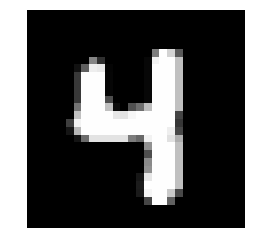

In [5]:
displaychar(train_data[58])

## 2. Fit SVM to training data

In [6]:
clf_lin = linearSVC(loss='hinge')
clf_quad = SVC(kernel='poly', degree=2, C=1.0)

In [7]:
# fit data to linear SVM
clf_lin.fit(train_data, train_labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [8]:
# fit data to linear SVM
clf_quad.fit(train_data, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
## Get predictions on training data for linear SVM
train_preds_lin = clf_lin.predict(train_data)
train_error_lin = float(np.sum((train_preds_lin > 0.0) != (train_labels > 0.0)))/len(train_labels)
## Get predictions on test data
test_preds_lin = clf_lin.predict(test_data)
test_error_lin = float(np.sum((test_preds_lin > 0.0) != (test_labels > 0.0)))/len(test_labels)
print(f"Error for linear SVM with C=1.0:\nTraining error: {train_error_lin}\n" +
      f"Test error: {test_error_lin}")

Error for linear SVM with C=1.0:
Training error: 0.0075
Test error: 0.009


In [10]:
## Get predictions on training data for polynomial SVM
train_preds_quad = clf_quad.predict(train_data)
train_error_quad = float(np.sum((train_preds_quad > 0.0) != (train_labels > 0.0)))/len(train_labels)
## Get predictions on test data
test_preds_quad = clf_quad.predict(test_data)
test_error_quad = float(np.sum((test_preds_quad > 0.0) != (test_labels > 0.0)))/len(test_labels)
print(f"Error for quadratic SVM with C=1.0:\nTraining error: {train_error_quad}\n" +
      f"Test error: {test_error_quad}")

Error for quadratic SVM with C=1.0:
Training error: 0.0
Test error: 0.0028
